In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

Загрузка данных:

In [2]:
X_train = []

for i in range(27):
    X_train.append(pd.read_csv(
            './data_csv/ECoG_X_train/ECoG_X_train_{0}.csv'.format(i+1),
            header=None))
    
X_train = pd.concat(X_train, axis=1, ignore_index=True).values

In [3]:
X_test = []

for i in range(27):
    X_test.append(pd.read_csv(
            './data_csv/ECoG_X_test/ECoG_X_test_{0}.csv'.format(i+1),
            header=None))
    
X_test = pd.concat(X_test, axis=1, ignore_index=True).values

In [4]:
Y_train = pd.read_csv('./data_csv/ECoG_Y_train.csv', header=None).values
Y_test = pd.read_csv('./data_csv/ECoG_Y_test.csv', header=None).values

Конструируем алгоритмы отбора признаков и модели:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from selector import Selector, LinearGeneticSelector
from qpfs import QPFS

s = Selector(QPFS(), "QPFS")
gen = LinearGeneticSelector()
lin = LinearRegression()
pls = PLSRegression()

Импортируем метрики:

In [6]:
from metric_classes import *

metric1 = RSS()
metric2 = Adjusted_Determination_Coefficient()
metric3 = Determination_Coefficient()
metric4 = VIF()
metric5 = BIC()
char1 = Condition_Number()
comp1 = Cp()

In [7]:
from model_comparison import *

c = ModelComparison([[gen, lin], [gen, pls], [s, lin], [s, pls]])
c.fit(X_train, Y_train, ns_features = np.arange(2, X_train.shape[1], 100))

Iteration 9 completed; Time: 38.13 seconds
Iteration 19 completed; Time: 35.83 seconds
Iteration 9 completed; Time: 36.48 seconds
Iteration 19 completed; Time: 36.15 seconds




In [8]:
c.evaluate([metric1, metric2, metric3, metric4, metric5],
                           [comp1], [char1], mode='dynamic')

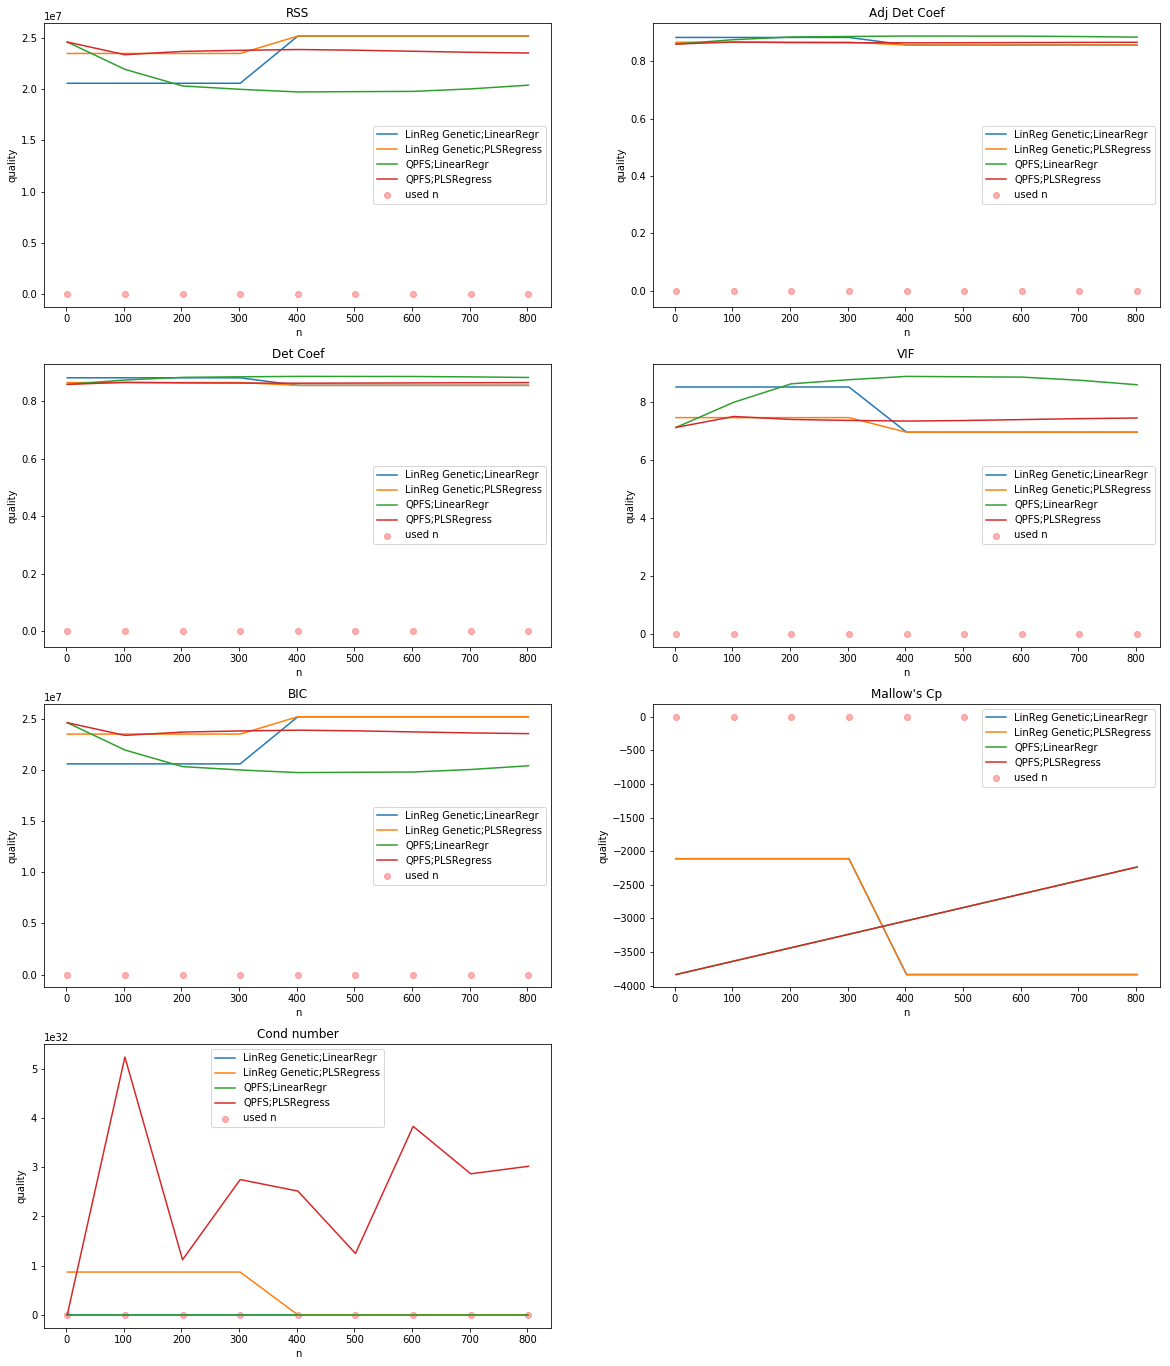

In [9]:
c.draw_quality()

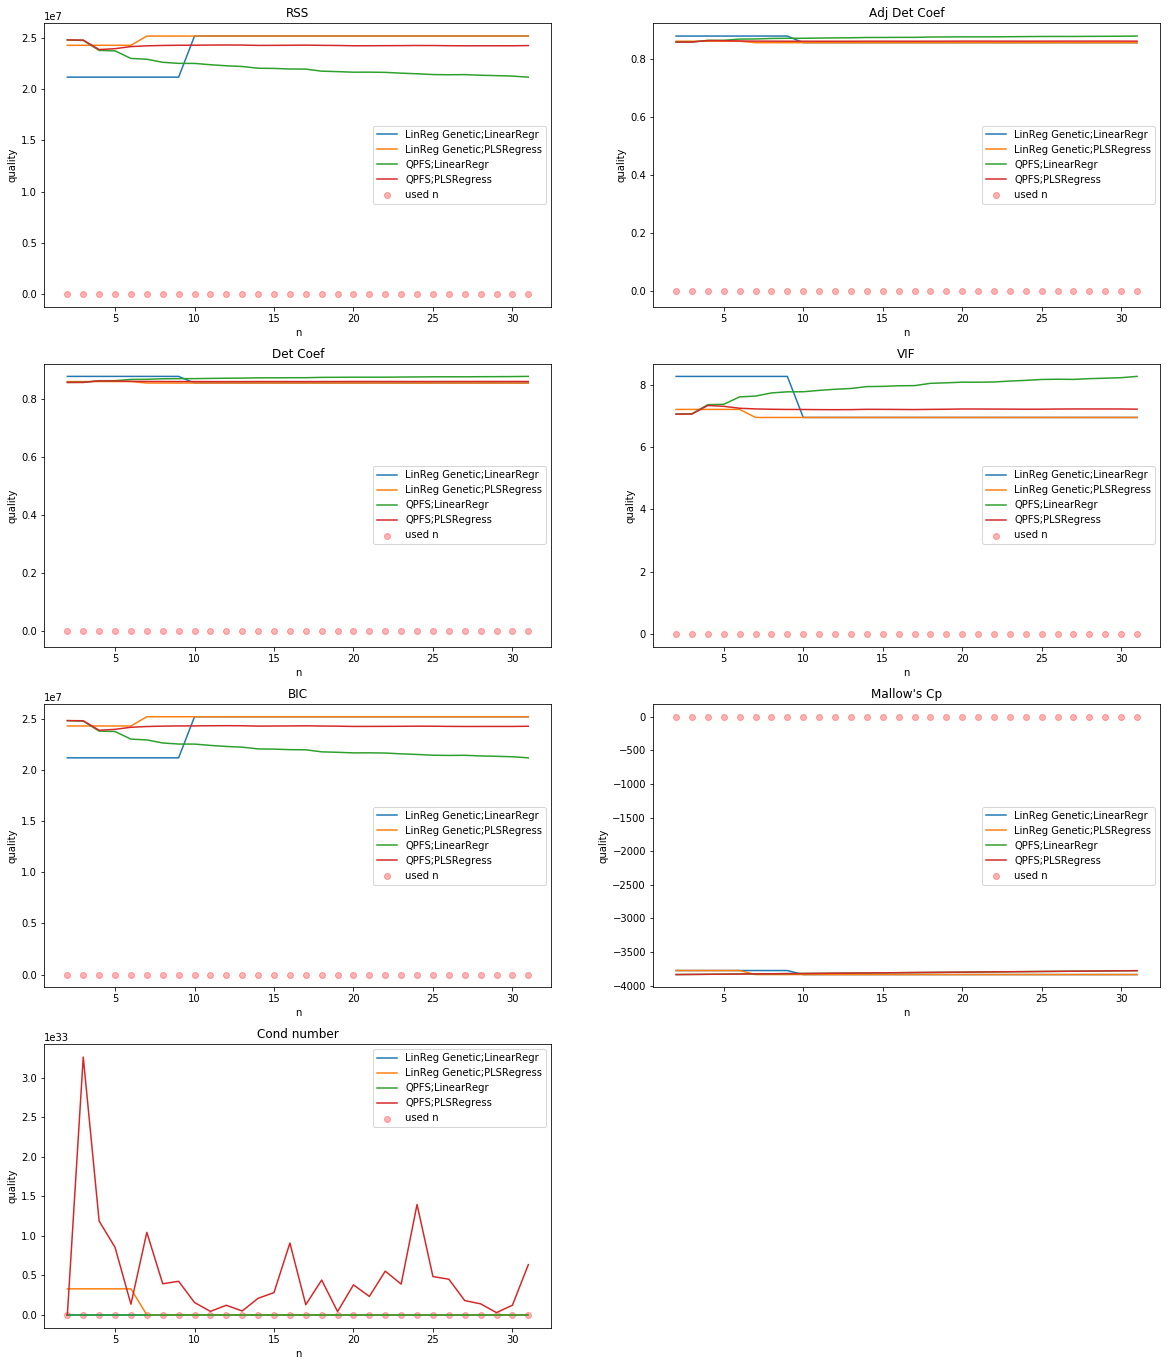

In [13]:
c.draw_quality()

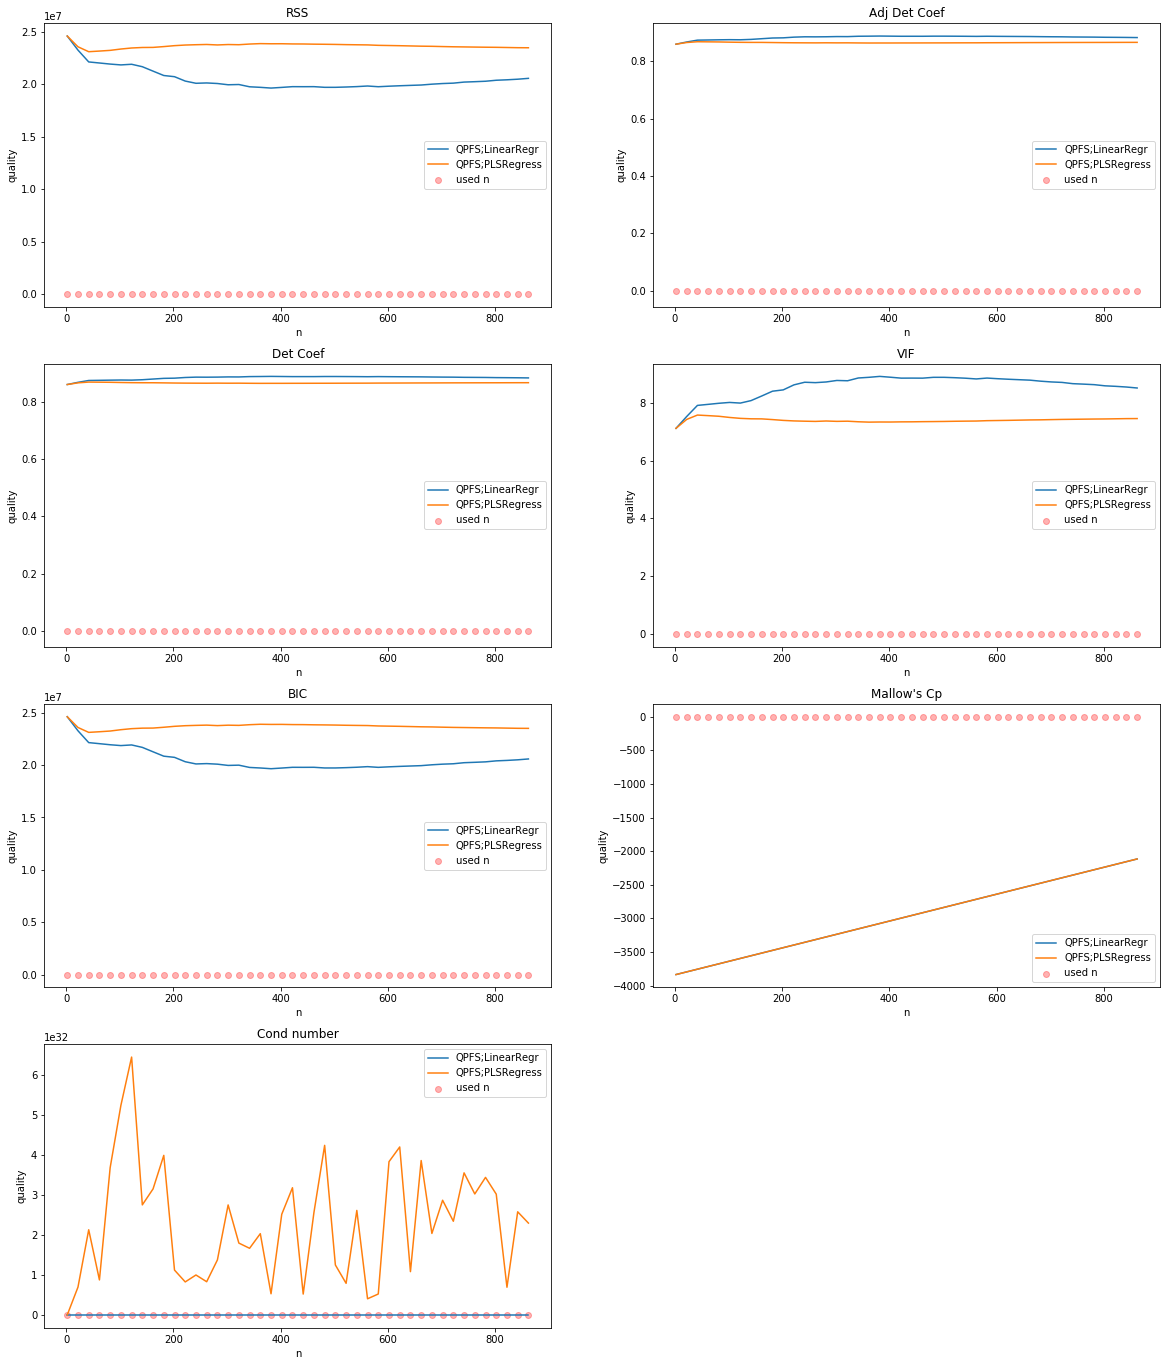

In [9]:
c.draw_quality()

In [28]:
from selector import ModelGeneticSelector
from sklearn.linear_model import LinearRegression

f = ModelGeneticSelector(LinearRegression(), generation_size=200, mutation_rate=0.5)
f = f.algo

In [29]:
f.fit(X_train[1000:, ], Y_train[1000:, ])

0.137345412721
0.143520026646
0.149332945161
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
Iteration 9 completed; Time: 1.39 seconds
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
0.151178184639
Iteration 19 completed; Time: 1.39 seconds


In [ ]:
f

In [1]:
import numpy as np
from sklearn.feature_selection import chi2

In [2]:
size = 300
y = np.array([x ** 2 for x in range(size)])
u1 = np.random.uniform(-20, 20, size)
u2 = np.random.uniform(-2, 2, size)
u3 = np.random.uniform(-40, 20, size)
u4 = np.random.uniform(-20, 40, size)
noise1 = np.random.normal(0, 2, size)
noise2 = np.random.normal(0, 3, size)
noise3 = np.random.normal(0, 5, size)

X = np.array([(y[i] + noise1[i], u1[i], u2[i], u3[i], y[i] + noise2[i], y[i] + noise3[i]) for i in range(size)])

In [3]:
import genetic
from importlib import reload 
reload(genetic)

from sklearn.linear_model import LinearRegression
def linear_model_score(X, y):
    lr = LinearRegression()
    return lr.fit(X, y).score(X, y)

ga = genetic.GeneticAlgorithm(score_func=linear_model_score, num_iterations=100, generation_size=2)
ga.fit(X, y)

0.999999989684
Iteration 0 completed; Time: 0.01 seconds


AttributeError: 'list' object has no attribute 'min'